In [2]:
import numpy as np
import matplotlib.pylab as plt 
import imageio.v3 as iio
import networkx as nx
from itertools import count


In [3]:

im = iio.imread('mapa_v2.png')
mapa=np.array(im)

(3, 3)


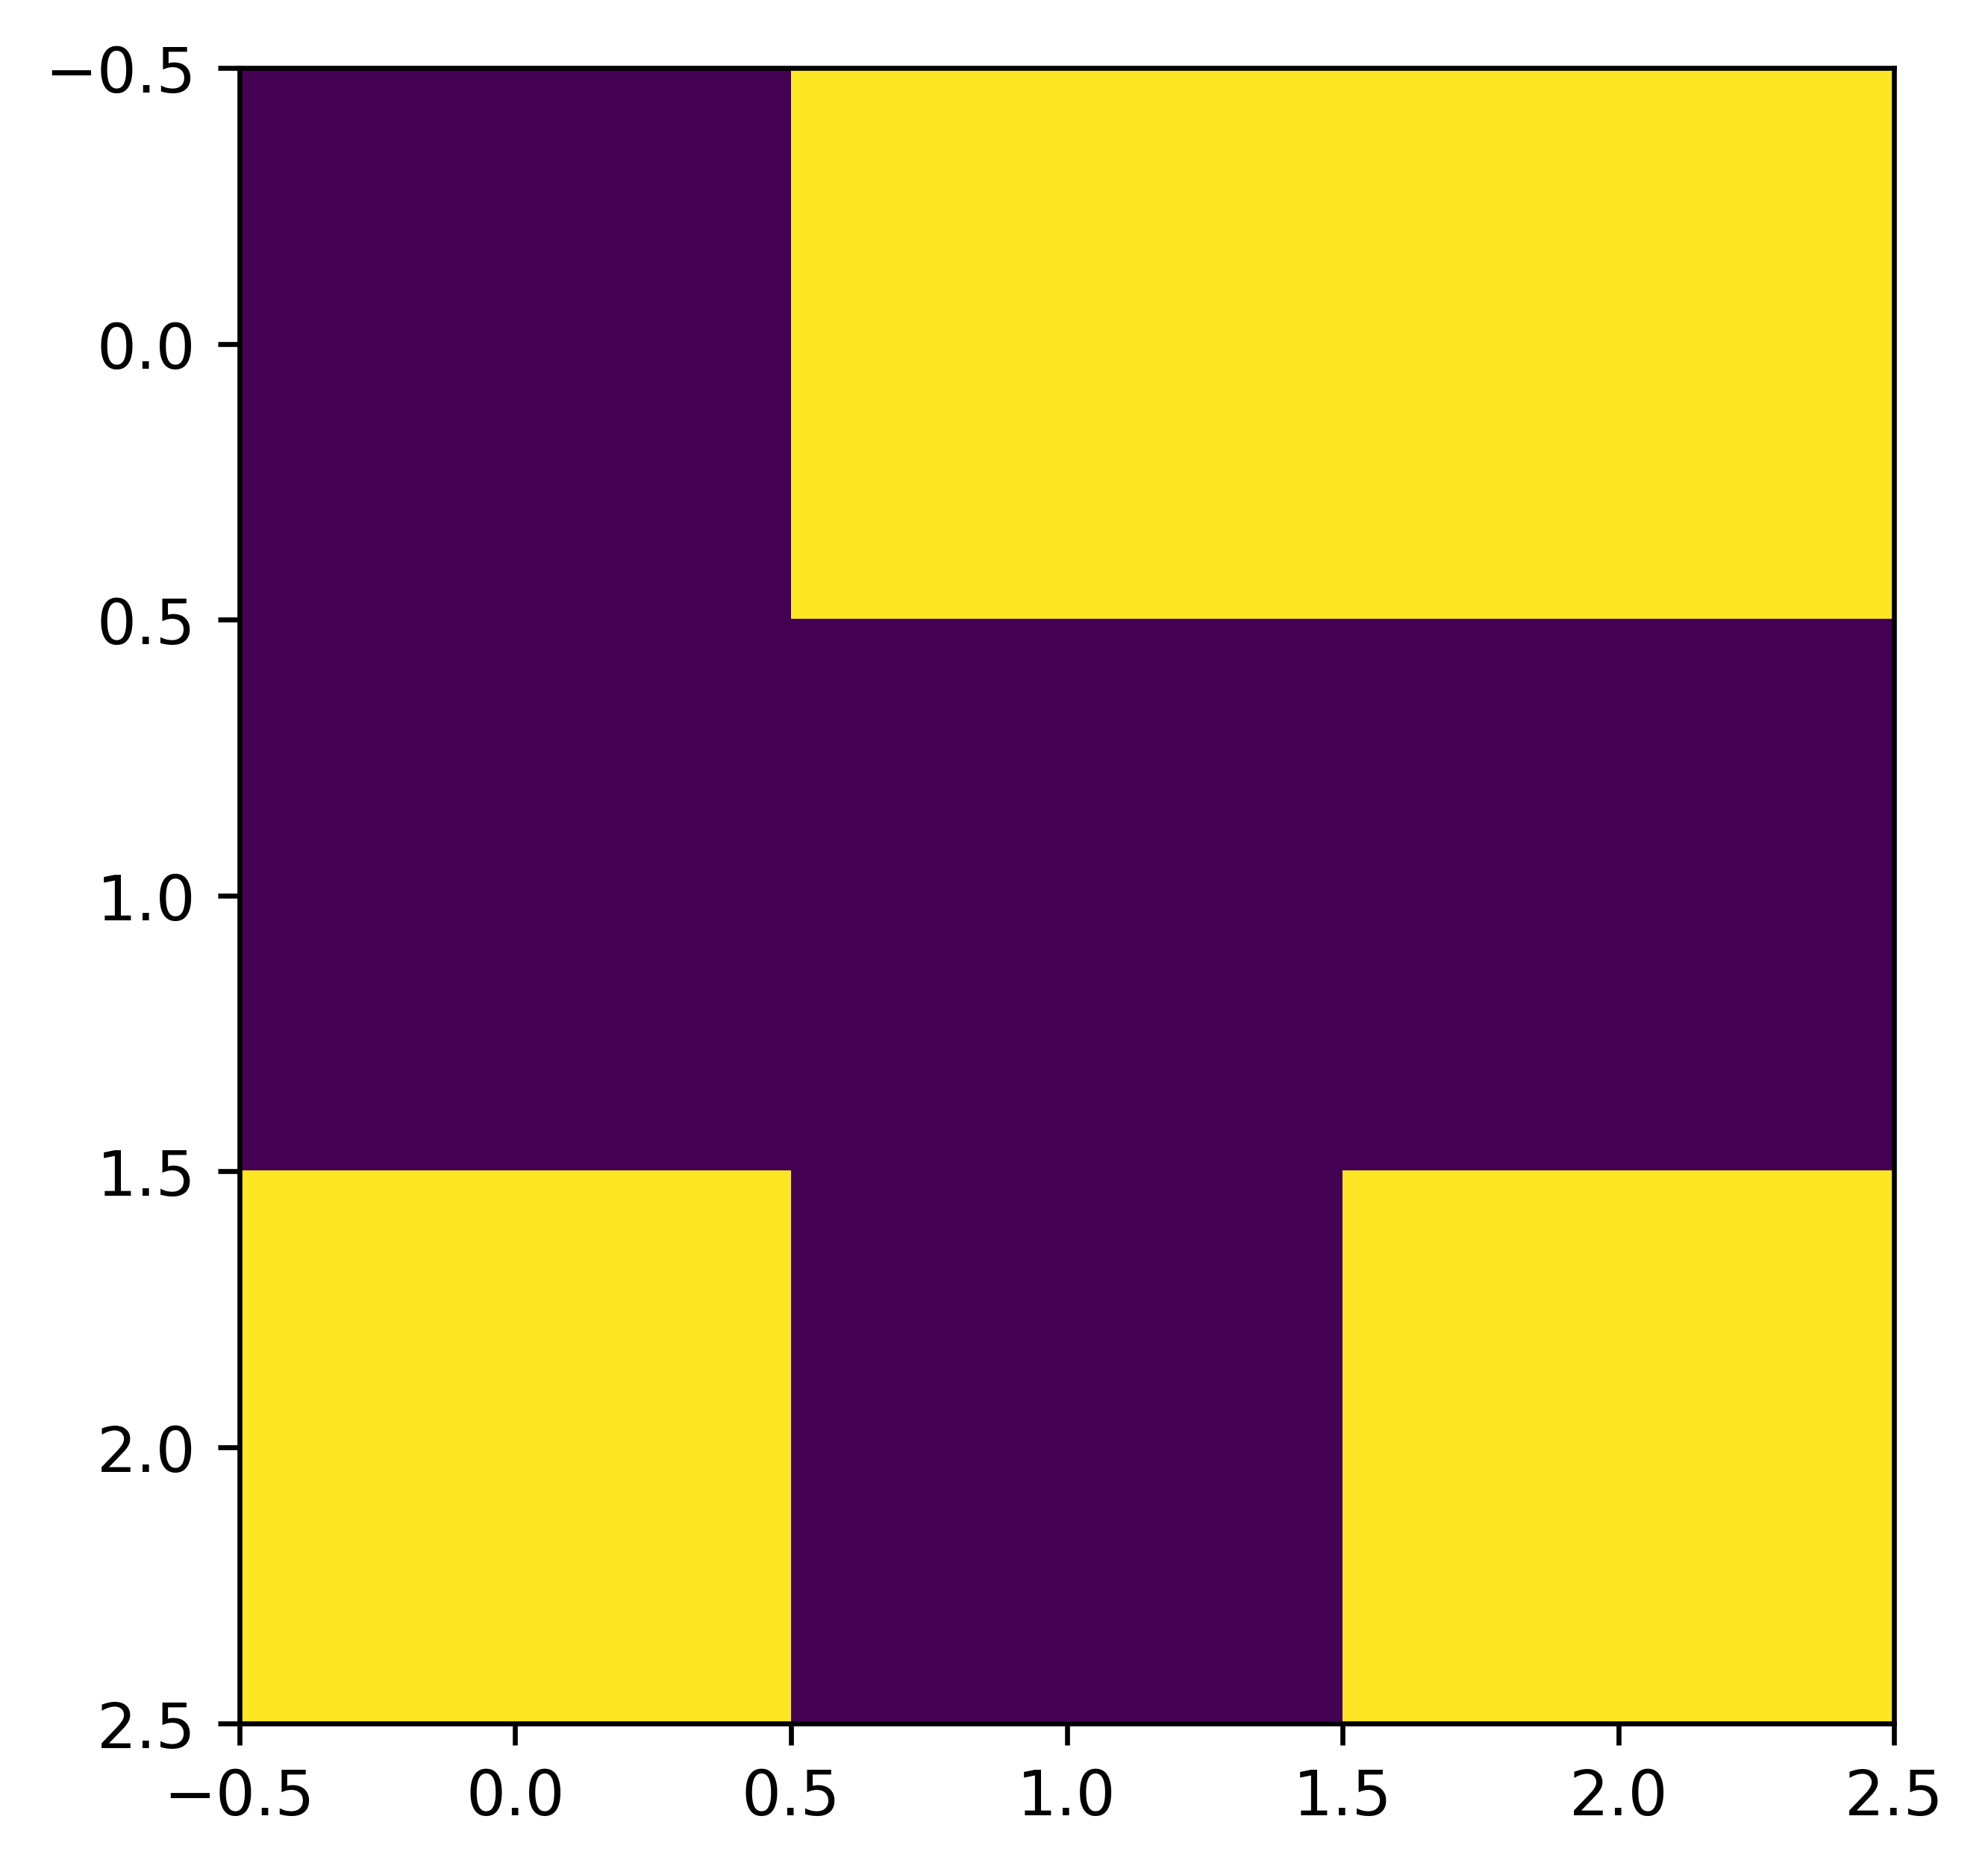

In [4]:
mapa_b=mapa>250
mapa_c=mapa_b[:, :, 0]*1
print(mapa_c.shape)
plt.figure(dpi=600)
plt.imshow(mapa_c.T)

In [5]:
G=nx.Graph()
nx.set_node_attributes(G, 0, "Aceso")
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):
        #print(i,j)
        k=str(i)+'_'+str(j)
        G.add_node(k)
        G.nodes[k]["Aceso"]=mapa_c[i,j]

print(mapa_c.shape)
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):

            k=str(i)+'_'+str(j)
            kd=str(i+1)+'_'+str(j)
            kb=str(i)+'_'+str(j+1)
            
            if i+1==mapa_c.shape[0]:
                if j+1<mapa_c.shape[1]:
                    G.add_edge(k,kb)
                    # print(k,'->',kb)
            elif j+1==mapa_c.shape[1]:
                
                G.add_edge(k,kd)
                # print(k,'->',kd)

            else :
                # print("---")
                G.add_edge(k,kd)
                G.add_edge(k,kb)
                # print(k,'->',kb)
                # print(k,'->',kd)

        


(3, 3)


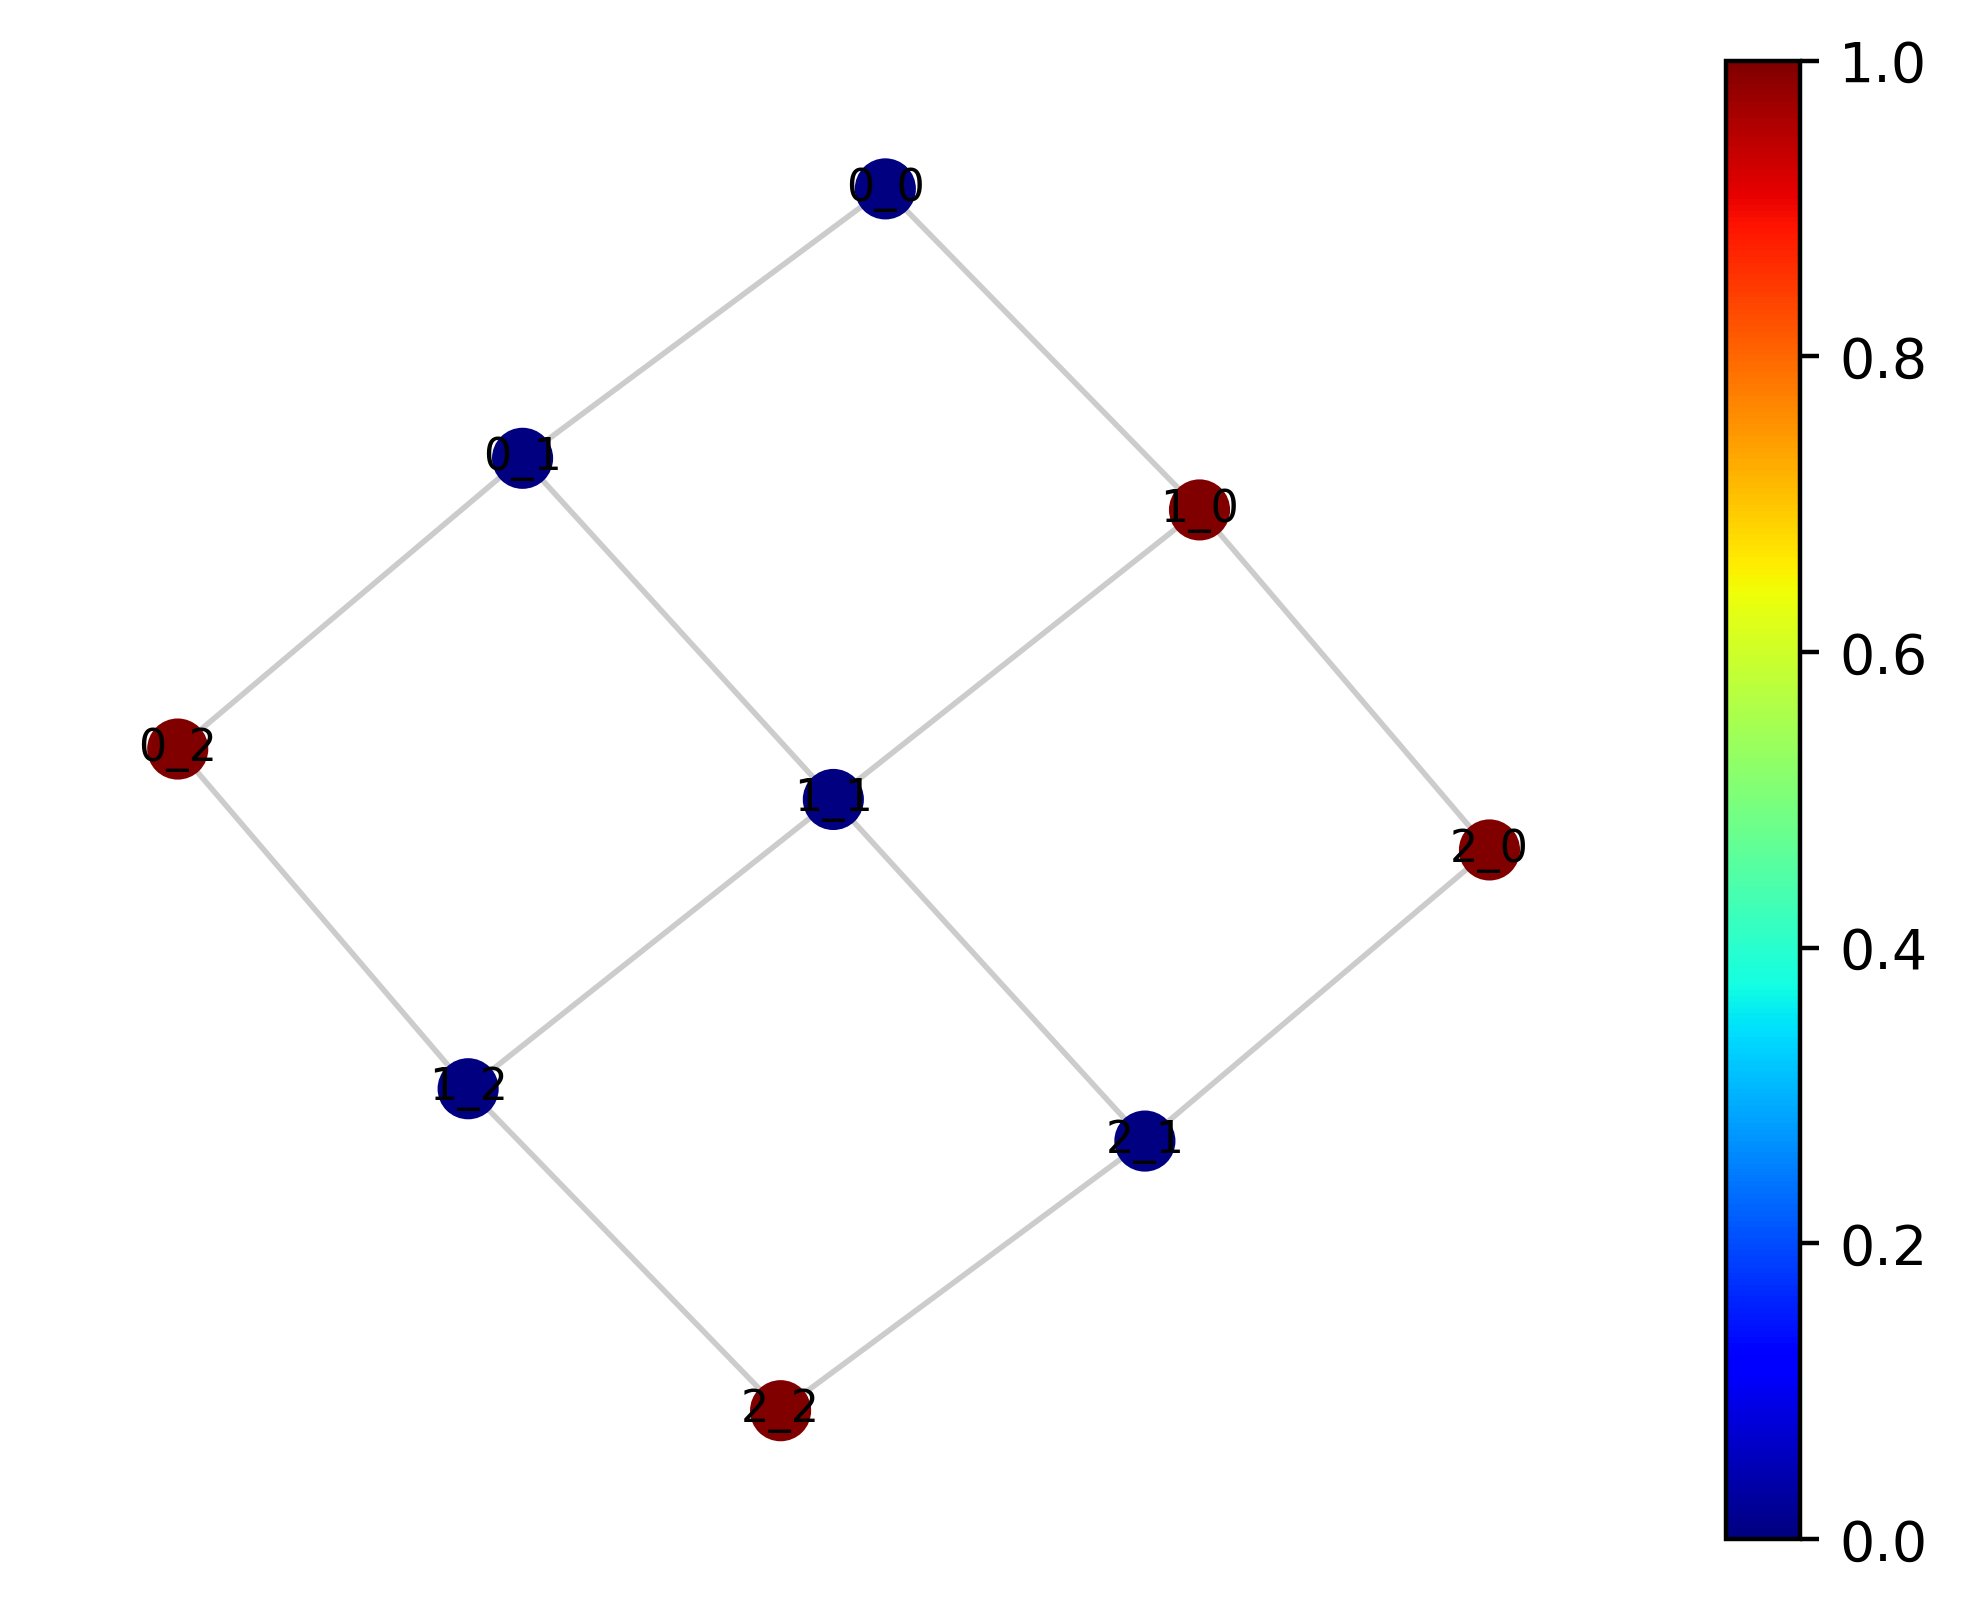

In [6]:

# get unique groups
def graph_atributo(G,atributo,label=False):
    plt.figure(dpi=400)
    groups = set(nx.get_node_attributes(G,atributo).values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.nodes[n][atributo]] for n in nodes]

    # drawing nodes and edges separately so we can capture collection for colobar
    pos = nx.spring_layout(G,iterations=400)
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    lc = nx.draw_networkx_labels(G, pos,font_size=8)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=100, cmap=plt.cm.jet)
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.show()

graph_atributo(G,"Aceso")

1 1
1 1


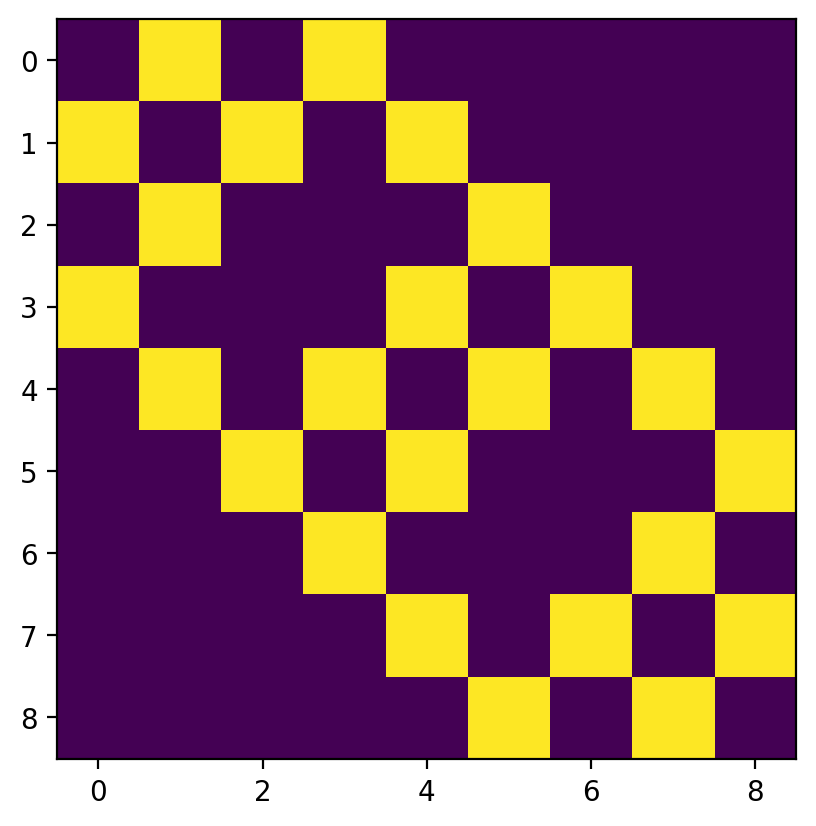

In [16]:
def matriz_nn(n):
    nn=n*n
    M=np.zeros((nn,nn),dtype=int)
    
    for i in range(nn):
        for j in range(nn):
            if i+n==j or i-n==j:
                M[i,j]=1


            if i+1==j or i-1==j:
                M[i,j]=1

            if i==j:
                # print(M[i,j])
                if i!=nn-1:
                    
                    if  i%n==0 and i!=0:
                        print(M[i-1,j],M[i,j-1])
                        M[i-1,j]=0
                        M[i,j-1]=0

    return M

A = nx.to_numpy_array(G)
plt.show()
M=matriz_nn(3)
plt.figure(dpi=200)
plt.imshow(M+A)

np.savetxt("Ma.csv", M, delimiter=",",fmt='%0d')

In [94]:
o=0
print(not o%5)
print(o%5==0)

True
True
